## Project Description

In this project, exploratory data analysis is performed on hotel bookings' data using __Python__, with relevant elaborations and visualisations presented together using __Jupyter Notebook__. There are a few key focuses for this project:

- To investigate factors impacting __cancellation rates__ at hotels
- To investigate __[ADR](https://www.investopedia.com/terms/a/average-daily-rate.asp)__ __(average daily rate) relationships__ with other categories of hotel data
- To identify opportunities for hotels to __maximise revenue__

The project involves the following steps:

- __Data Sourcing and Uploading__: A suitably large, free-to-use dataset containing multiple factors is located and downloaded.
- __Data Cleaning and Initial Exploration__: The dataset is cleaned such as through deletion of null values, and initial details involving datatypes and statistics are obtained.
- __Exploratory Data Analysis__: Additional features (i.e. categories) are engineered involving use of user-built function, and various code segments are written to draw valuable insights mainly in the form of visualisations.


## Dataset Details

The dataset used in this project is from Kaggle and is derived from an actual case study involving two hotels, with individually identifiable details having been omitted. The dataset contains details pertaining to hotel booking and cancellation data, including countries, arrival dates, and lead time. Additional details as well as the raw dataset can be found __[here](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)__.

## Project Execution

The project will now be executed, beginning with importing of required libraries containing Python functions which will be used to clean, explore and analyse the dataset.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


## Data Cleaning and Exploration

With the dataset having successfully been uploaded as a dataframe "df", data cleaning and initial exploration can now begin.
The main information such as datatypes and number of data values (including null values) is first checked.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We observe that there are many columns with the object datatype, 4 columns with null values, and a date column "reservation_status_date" which has an object datatype. We shall first deal with the date column datatype change.

In [4]:
# modify dtype for reservation_status_date, needed to specify format due to error
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

We will next deal with removing the null values from the 4 columns. For columns with a significant amount of data missing, entire columns will be dropped from the dataframe. 

In [5]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
# agent and company columns can be dropped due to large amount of data missing, but only drop na values in children and country columns
df.drop(['agent', 'company'], axis = 1, inplace = True)
df.dropna(inplace = True)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

With the dataframe having been cleaned up, we will now further explore the columns containing the object datatype. This is to ensure that there isn't a mixture of numeric and non-numeric values, and also to gain further insight into the details of each column.

In [7]:
# Display unique values for columns with object datatype, to verify if any mixture of numeric and non-numeric values
object_col = df.select_dtypes(include = ['object']).columns
for col in object_col:
    unique_val = df[col].unique()
    print(col, unique_val)
    print ("-"*50)

hotel ['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

Now that we have examined the existing dataframe in greater detail, we can proceed to create additional columns of data from existing columns in a process known as feature engineering. First, we will create a column combining the arrival day, month, and year details.

But before this, the month data will first be transformed to a numeric form by a mapping process.

In [8]:
# new column called 'arrival_month_num' created to map months to integers created
month_to_num = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                   'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df.insert(4, 'arrival_month_num', df['arrival_date_month'].map(month_to_num))

display(df)
df.info()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_month_num,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,8,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,8,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,8,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_month_num               118898 non-null  int64         
 5   arrival_date_month              118898 non-null  object        
 6   arrival_date_week_number        118898 non-null  int64         
 7   arrival_date_day_of_month       118898 non-null  int64         
 8   stays_in_weekend_nights         118898 non-null  int64         
 9   stays_in_week_nights            118898 non-null  int64         
 10  adults                          118898 non-null  int64       

Now that we have verified the creation of a column "arrival_month_num" containing numeric values, we can proceed to combine the arrival date details and form a new column "arrival_date".

In [9]:
# feature engineering to combine arrival date, month and year into single column in datetime datatype
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_month_num', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis = 1), format = '%Y-%m-%d')
df.insert(3, 'arrival_date', df.pop('arrival_date'))
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

display(df)
df.info()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_month_num,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,7,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,7,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,7,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,7,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,8,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,8,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,8,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,8,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date                    118898 non-null  datetime64[ns]
 4   arrival_date_year               118898 non-null  int64         
 5   arrival_month_num               118898 non-null  int64         
 6   arrival_date_month              118898 non-null  object        
 7   arrival_date_week_number        118898 non-null  int64         
 8   arrival_date_day_of_month       118898 non-null  int64         
 9   stays_in_weekend_nights         118898 non-null  int64         
 10  stays_in_week_nights            118898 non-null  int64       

With the above creation and verification of a new column under datetime datatype, we can proceed with the creation of another column. This column will be created to compare assigned and reserved rooms to identify possible mismatches, which could be a possible reason for cancellations.

In [10]:
# feature engineering to check if assigned and received rooms are matching, to check if correlated to cancellations
# new column called 'rooms_matching' created
def room_val_matching(df, res_room, assign_room):
    df.insert(23, 'rooms_matching', df.apply(lambda row: 'Matching' if row[res_room] == row[assign_room] else 'Not Matching', axis=1))
room_val_matching(df, 'reserved_room_type', 'assigned_room_type')

df

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_month_num,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,rooms_matching,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,7,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,Matching,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,7,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,Matching,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,Not Matching,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,7,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,Matching,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,7,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,Matching,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,8,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,Matching,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,8,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,Matching,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,8,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,Matching,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,8,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,Matching,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


We have completed the creation of additional columns which will be used for further analysis later on. 

Let us now take a look at basic statistical data for the entire dataframe.

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_month_num,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016-08-29 02:40:04.440781312,2016.157656,6.552886,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015-07-01 00:00:00,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016-03-14 00:00:00,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016-09-07 00:00:00,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017-03-19 00:00:00,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017-08-31 00:00:00,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,NaN,0.707459,3.087050,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


There are some columns showing unrealistic extremes as outlier data. In particular, the adr or average daily rate contains a max value of 5400 and min value which is negative. We will perform a simple boxplot which is good at highlighting outlier data. 

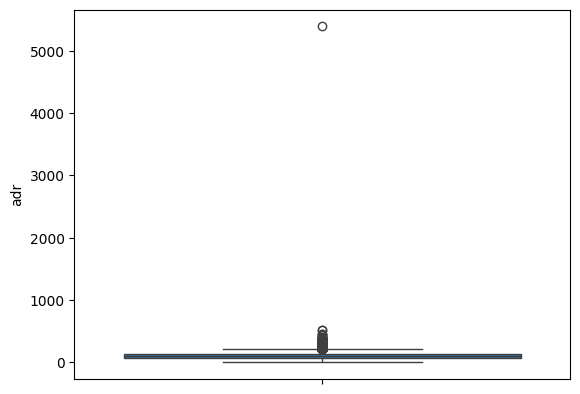

In [12]:
# outlier data detected in one the key columns, 'adr' which refers to average daily rate 
sns.boxplot(y = df['adr']);
plt.show()

From the above boxplot, it is clear the datapoint of 5400 is an anomaly, with the remaining data well below 1000. We will proceed to limit the dataframe to data greater than or equals to 0 and less than 5000.

In [13]:
# removing the outlier from the dataframe through filtering
df = df[(df['adr'] >= 0) & (df['adr'] < 5000)]
display(df)

,hotel,is_canceled,lead_time,arrival_date,arrival_date_year,arrival_month_num,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,rooms_matching,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,7,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,Matching,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,7,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,Matching,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,Not Matching,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,7,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,Matching,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,7,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,Matching,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,8,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,Matching,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017-08-31,2017,8,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,Matching,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017-08-31,2017,8,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,Matching,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017-08-31,2017,8,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,Matching,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


With this, we are left with a cleaned dataframe comprising 118,896 rows and 33 columns of data. We will proceed with exploratory data analysis in the next section.

## Exploratory Data Analysis

In this section, data will be explored and analysed mainly focusing on adr (average daily rate) and cancellation data, and how they might be correlated with data from other categories. We will first focus on cancellation data, beginning with a simple determination of the percentage of cancellations across both hotel types.

In [14]:
# determining cancellation percentage
cancelled_perc = df['is_canceled'].value_counts(normalize = True)*100
cancelled_perc

is_canceled
0    62.865025
1    37.134975
Name: proportion, dtype: float64

From the above, we see that ~37.1% of bookings are cancelled. With much room for improvement, we will proceed to investigate possible factors impacting cancellations.

First, let us investigate possible correlation between cancellation and hotel types.

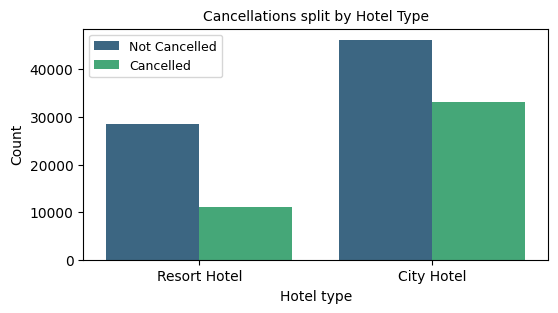

In [15]:
# visualising cancellation data by the two types of hotels, 'City' and 'Resort'
plt.figure(figsize = (6, 3))
sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette='viridis')
plt.title('Cancellations split by Hotel Type', size = 10)
plt.xlabel('Hotel type')
plt.ylabel('Count')
plt.legend(fontsize = 9, loc = 'upper left', labels = ['Not Cancelled', 'Cancelled'])
plt.show()

From the above bar graph, we can infer visually that the city hotel is performing worse when it comes to cancellations, both in absolute counts as well as cancellation ratios. Let us determine the exact percentages for both hotel types.

In [16]:
# calculating cancellation percentage for 'city' followed by 'resort' hotel type
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel_cancel = city_hotel['is_canceled'].value_counts(normalize = True)*100

resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel_cancel = resort_hotel['is_canceled'].value_counts(normalize = True)*100

print ("City hotel cancellation percentages")
display(city_hotel_cancel)

print ("Resort hotel cancellation percentages")
resort_hotel_cancel

City hotel cancellation percentages


is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

Resort hotel cancellation percentages


is_canceled
0    72.024245
1    27.975755
Name: proportion, dtype: float64

As we can see, the cancellation percentage in the city hotel is currently ~41.7%. Let us examine other factors in relation to cancellation data, such as the arrival month.

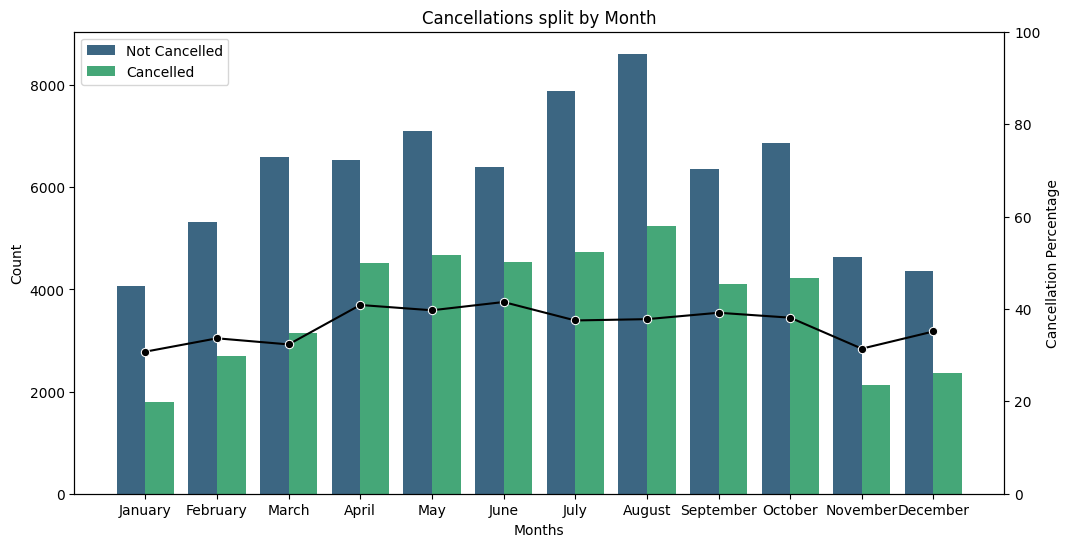

In [17]:
# visualising cancellation data by the different months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

cancel_percent_by_month = df.groupby('arrival_date_month')['is_canceled'].mean() * 100

fig, ax1 = plt.subplots(figsize = (12, 6))
sns.countplot(x = 'arrival_date_month', hue = 'is_canceled', data = df, palette = 'viridis', order = month_order, ax = ax1)
plt.title('Cancellations split by Month', size = 12)
plt.legend(fontsize = 10, loc = 'upper left', labels = ['Not Cancelled', 'Cancelled'])
plt.xlabel('Months')
plt.ylabel('Count')

ax2 = plt.twinx()
sns.lineplot(x = cancel_percent_by_month.index, y = cancel_percent_by_month.values, marker = 'o', color = 'black', ax = ax2)
plt.ylabel('Cancellation Percentage')
ax2.set_ylim(0, 100)

plt.show()

From the above visualisation, we can see cancellation percentages presented together with absolute cancellation count data. The absolute count data has formed a distribution that somewhat resembles a normal distribution, with the months of July and August having the highest counts. However, this is more likely to be coincidental and can be attributed to increased travel preferences during the summer period. Cancellation percentages are fairly constant throughout the year, with the earlier and later months in the year showing slightly lower cancellation percentages.

Next, we will take a look at data from the different countries bookings have been made from. We will be focusing on the top 10 countries as an initial approximation of how the data is distributed.

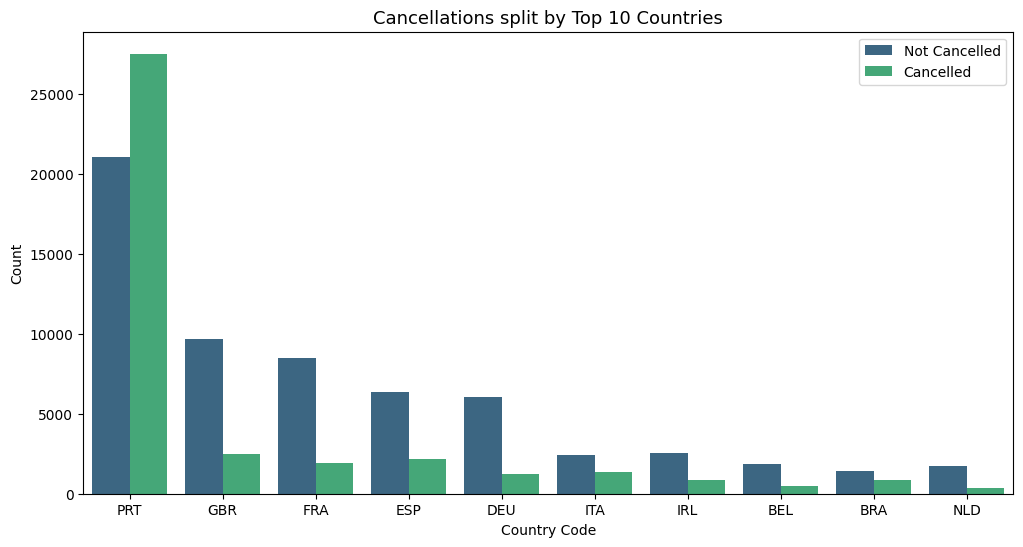

In [18]:
# visualising cancellation trends by the top 10 countries with highest data count
plt.figure(figsize = (12, 6))
sns.countplot(x = 'country', data = df, hue = 'is_canceled', palette = 'viridis', order = df['country'].value_counts().head(10).index)
plt.title('Cancellations split by Top 10 Countries', size = 13)
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.legend(fontsize = 10, loc = 'upper right', labels = ['Not Cancelled', 'Cancelled'])
plt.show()

The above visualisation shows a clear leader, PRT (i.e. Portugal), representing the bulk of bookings. Unfortunately, Portugal also has a cancellation percentage of >50%. We will determine the exact count of cancellations by Portugal.

In [19]:
counts = df[df['country'] == 'PRT'].groupby('is_canceled').size()
print(counts)

is_canceled
0    21071
1    27514
dtype: int64


A total of 27,514 cancellations represents ~23.1% of all bookings made across all countries. This is a significant contributor and should be focused on by the hotels to bring down cancellations.

Next, let us explore possible correlation between market segment (i.e. bookings' breakdown by different booking avenues) and cancellations.


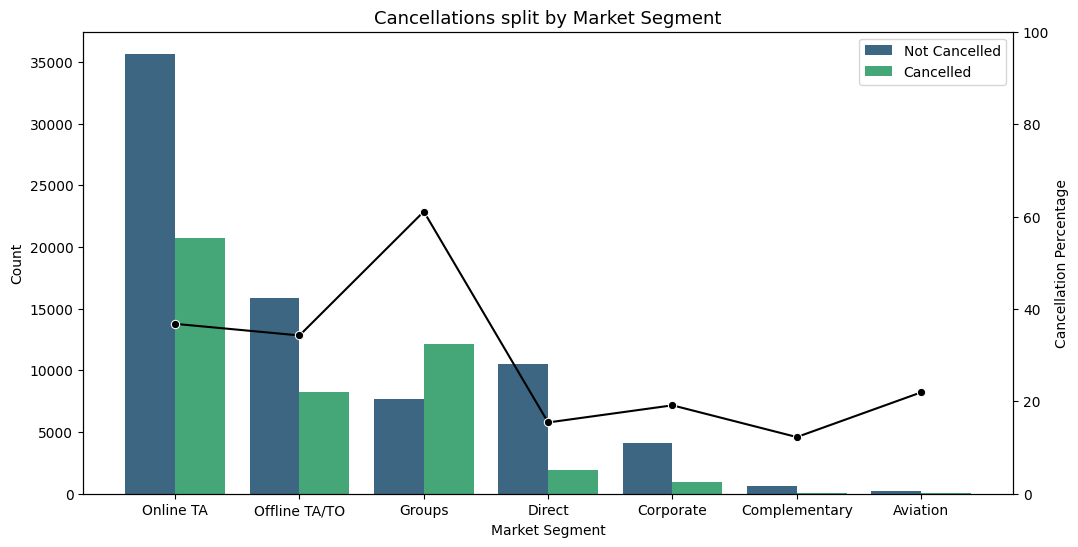

In [20]:
cancel_percent_by_market_seg = df.groupby('market_segment')['is_canceled'].mean() * 100

fig, ax1 = plt.subplots(figsize = (12, 6))
sns.countplot(x = 'market_segment', hue = 'is_canceled', data = df, palette = 'viridis', order = df['market_segment'].value_counts().index, ax = ax1)
plt.title('Cancellations split by Market Segment', size = 13)
plt.legend(fontsize = 10, loc = 'upper right', labels = ['Not Cancelled', 'Cancelled'])
plt.xlabel('Market Segment')
plt.ylabel('Count')

ax2 = plt.twinx()
sns.lineplot(x = cancel_percent_by_market_seg.index, y = cancel_percent_by_market_seg.values, marker = 'o', color = 'black', ax = ax2)
plt.ylabel('Cancellation Percentage')
ax2.set_ylim(0, 100)

plt.show()

We observe that Online TA (i.e. online tour agencies) are the leading market segment. While they rank the highest in terms of absolute count of cancellations and should be focused on, they only have a cancellation percentage of ~30%. In comparison, the segment of tourist groups has the highest cancellation percentage of ~60%, as well as the second highest absolute count of cancellations, and should therefore also be focused on.

We will now look at how lead time might play a role in cancellations.


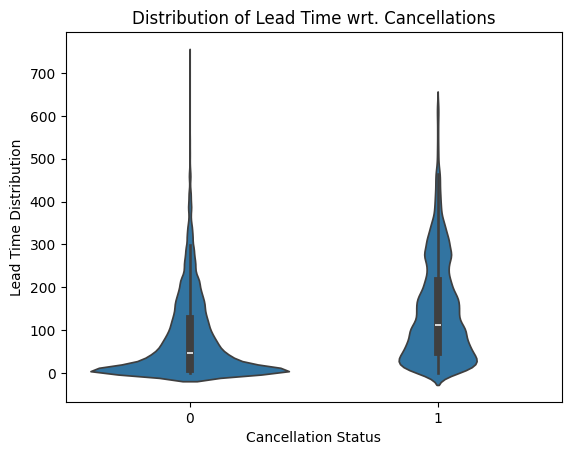

In [21]:
sns.violinplot(x = 'is_canceled', y = 'lead_time', data = df)
plt.title('Distribution of Lead Time wrt. Cancellations')
plt.xlabel('Cancellation Status')
plt.ylabel('Lead Time Distribution')
plt.show()


The above visualisation known as a violin plot, shows clearly that bookings made with a lead time close to 0 days increases the likelihood of a non-cancellation. Looking at cancelled bookings, we observe a slightly increased density in data around a lead time of ~300 days, though this is still not as high as the density around a lead time of ~20-30 days, which should remain the priority of hotels.

Next, we will explore the possibility of correlation between cancellations and mismatched rooms.


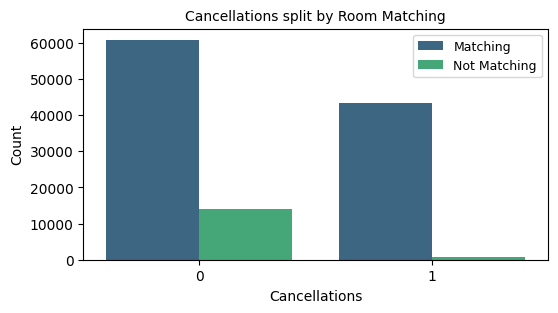

In [22]:
# visualising cancellation data with respect to whether rooms are matching or not
plt.figure(figsize = (6, 3))
sns.countplot(x = 'is_canceled', hue = 'rooms_matching', data = df, palette = 'viridis')
plt.title('Cancellations split by Room Matching', size = 10)
plt.xlabel('Cancellations')
plt.ylabel('Count')
plt.legend(fontsize = 9, loc = 'upper right', labels = ['Matching', 'Not Matching'])
plt.show()

We observe that in terms of ratios, cancellations actually perform better with regards to non-matching rooms compared to non-cancellations. Additionally, the majority of non-matching rooms actually fall under non-cancelled bookings, implying the matching of rooms does not heavily impact cancellations.

Having analysed the data from the perspective of cancellations, we will now switch to investigating possible correlations of ADR (i.e. average daily rate) with other factors, beginning with plotting the monthly trend of ADR.

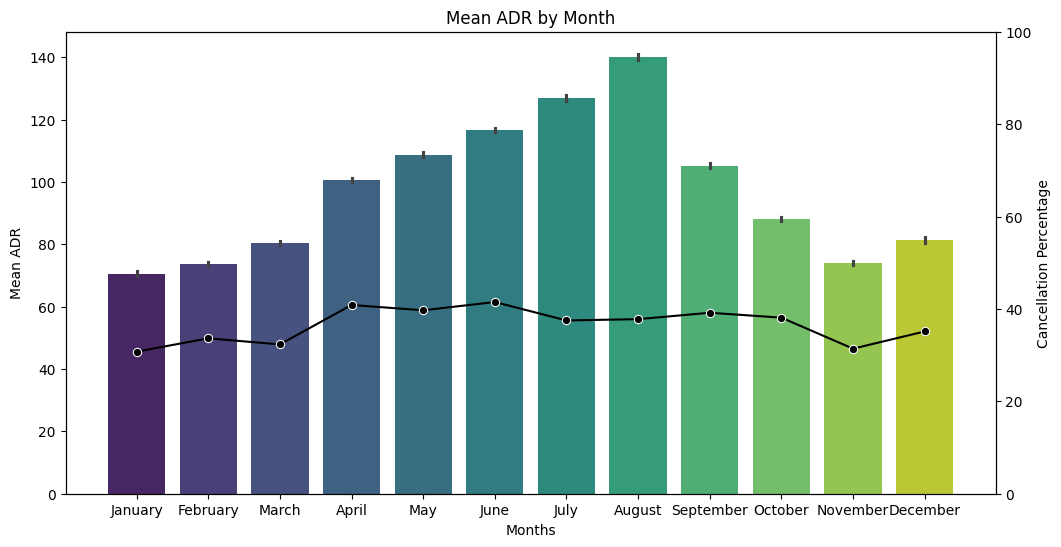

In [23]:
# visualising ADR data together with cancellation percentages by the different months
fig, ax1 = plt.subplots(figsize = (12, 6))
sns.barplot(x = 'arrival_date_month', y = 'adr', data = df, palette = 'viridis', order = month_order, ax = ax1)
plt.title('Mean ADR by Month', size = 12)
plt.xlabel('Months')
plt.ylabel('Mean ADR')

ax2 = plt.twinx()
sns.lineplot(x = cancel_percent_by_month.index, y = cancel_percent_by_month.values, marker = 'o', color = 'black', ax = ax2)
plt.ylabel('Cancellation Percentage')
ax2.set_ylim(0, 100)

plt.show()

We once again notice a distribution resembling that of a normal distribution. Additionally, we observe that despite an increasing trend of mean ADR from the beginning of the year until August, there is no clear similar trend in cancellation percentages, with July and August even observing a slight decline compared to preceding months. This is a good indication of how the hotels have maximised revenue by increasing prices without suffering an increase in cancellations in terms of percentages.

Let us examine whether the differences in hotel type play a role in influencing mean ADR across the year.


In [24]:
city_hotel_adr_by_date = city_hotel.groupby('arrival_date')[['adr']].mean()
resort_hotel_adr_by_date = resort_hotel.groupby('arrival_date')[['adr']].mean()

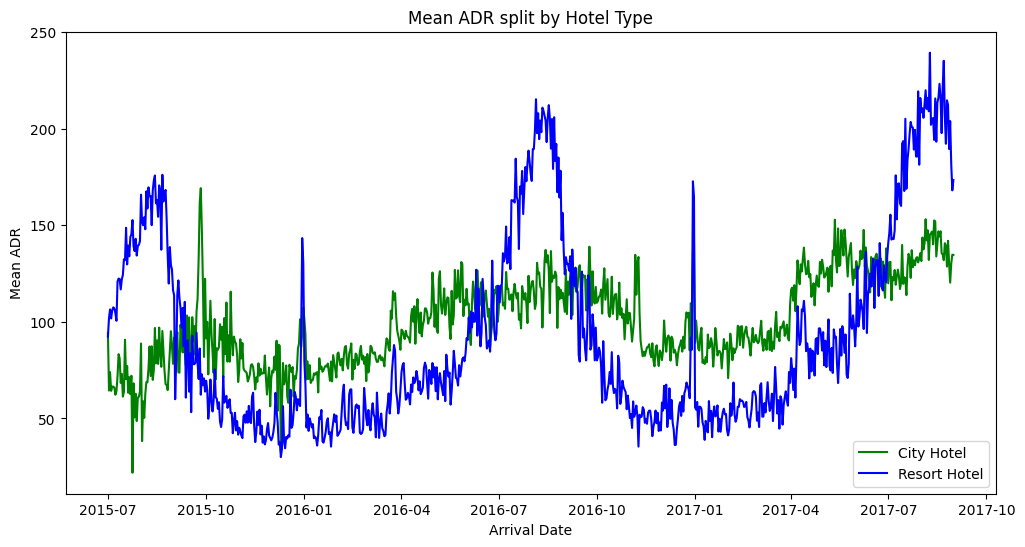

In [25]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = city_hotel_adr_by_date.index, y = city_hotel_adr_by_date['adr'], color = 'green', label = 'City Hotel')
sns.lineplot(x = resort_hotel_adr_by_date.index, y = resort_hotel_adr_by_date['adr'], color = 'blue', label = 'Resort Hotel') 
plt.title('Mean ADR split by Hotel Type')
plt.legend(fontsize = 10, loc='lower right')
plt.xlabel('Arrival Date')
plt.ylabel('Mean ADR')
plt.show()

The above data trends provide some valuable insights. Firstly, it is clear that the earlier observed increasing ADR trend can be attributed to the resort hotel, likely due to a surge in demand during the summer period. This can be supported by an earlier visualisation, where we determined that the top 10 countries from which bookings are made were mostly from the Europe and UK regions, which experience a summer break around July and August. The surge in demand rapidly declines after August (i.e. once summer is over), as shown by a rapid decline in ADR. Interestingly, there is a sharp spike in demand for the resort hotel during the new year's period, which is not observed in the city hotel. We observe that the city hotel does experience some semblance of seasonal trend, with slightly higher ADR during the summer period, though ADR experiences less difference throughout the year as compared to that of the resort hotel.

We will now explore ADR data with respect to customer type.


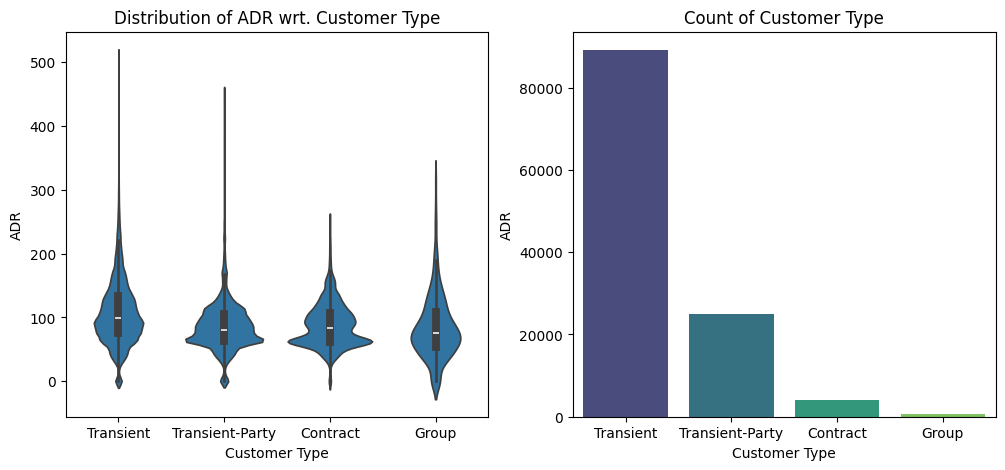

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.violinplot(x = 'customer_type', y = 'adr', data = df, order = df['customer_type'].value_counts().index, ax = axes[0] )
axes[0].set_title('Distribution of ADR wrt. Customer Type')
axes[0].set_xlabel('Customer Type')
axes[0].set_ylabel('ADR')

sns.countplot(x = 'customer_type', data = df, palette = 'viridis', order = df['customer_type'].value_counts().index, ax = axes[1])
axes[1].set_title('Count of Customer Type')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('ADR')
plt.show()

The above shows two visualisations. The bar graph on the right shows that the majority of bookings are made by the transient customer type. Looking at the violin plot on the left, we observe that this customer type has a slightly higher mode (i.e. highest data density) at approximately 90-95 compared to the other customer types (~75-85). There exists an opportunity to increase the ADR for these customer types as well to maximise overall revenue for the hotels.

## Summary of Insights

Having concluded the exploratory data analysis, we can summarise key insights drawn and focus areas from two different angles as follows:

__Cancellations__:
1. The city hotel has both a higher count of cancellations as well as a higher cancellation percentage (~41.7% vs 28.0%), making it important to focus on.
2. Cancellation percentages are fairly constant throughout the year, with the monthly count data appearing to resemble that of a normally distributed dataset. This, however is likely to be coincidental due to increased travel preferences during the European summer period (i.e. July, August)
3. Portugal is solely responsible for 27,514 cancellations, which is ~23.1% of all bookings. There is a huge opportunity to reduce cancellations by delving deeper into this observation. It should also be noted that looking at the top 10 countries, bookings are mostly from the European and Great Britain countries.
4. A higher lead time is clearly linked to cancellations, with a lead time of ~20-30 days representing the period with the highest data density and therefore a possible focus area.
5. The engineered feature of non-matching rooms (looking at reserved vs assigned rooms) interestingly does not show any impact on cancellations, with almost all non-matching rooms falling under non-cancelled bookings.

__ADR (Average Daily Rate)__:
1. The mean ADR shows an increasing monthly trend until August before decreasing, while cancellation percentages remain fairly constant throughout the year. This implies good maximisation of revenue from the hotels without impacting cancellation percentages.
2. A clear cyclical trend can be observed looking at the mean ADR trend for the resort hotel, with months in the European summer season heavily favoured over the other months in a year. Also noteworthy are the spikes in ADR during New Year’s Day for the resort hotel, again demonstrating good capitalisation of inelastic demand during that period.
3. There exists some room to explore matching the ADR of non-transient customer types (~75-85) to the main transient customer type at 90-95, to increase overall revenue. revenue.
